In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import h5py
import copy
import datetime
import ta
from sklearn.model_selection import train_test_split
# Do you wanna see?
verbose = True

import sys
sys.path.append('../')

from utils.data_extraction import load_data
from utils.data_cleaning import HFDataCleaning
from utils.generate_features import candleCreateNP_vect_final, generateFeatures_final
from utils.preprocessing_features_and_labels import extract_labels, align_features_and_labels

### Load data etc

In [2]:
# print(os.listdir())
try:
    path = 'a:/taqhdf5'  #'a:/taqhdf5'
    os.listdir(path)
except:
    path = 't:/taqhdf5'  #'a:/taqhdf5'
    os.listdir(path)    
# allFiles = os.listdir(path)
# print(len(allFiles), allFiles[:5], allFiles[-5:])
# print(allFiles[-10:])

#dates = np.array(['2020040' + str(i) if i < 10 else '202004' + str(i) for i in np.arange(1,32)]).astype(int)
dates = np.array(['20200401','20200402']).astype(int)

# Provide a list of tickers of interest
tickers = ['GOOG']#'MSFT'

# Do we need data on trades, quotes or both?
dataNeeded = 'trades' # 'trades', 'quotes' or 'both'

# run load_data()
if dataNeeded == 'trades':
    tradeData = load_data(dates, tickers, dataNeeded, path, verbose)
elif dataNeeded == 'quotes':
    quoteData = load_data(dates, tickers, dataNeeded, path, verbose)
elif dataNeeded == 'both':
    tradeData, quoteData = load_data(dates, tickers, dataNeeded, path, verbose)

['.ipynb_checkpoints', 'preprocessing.ipynb', 'testing_and_comparing_candlesticks.ipynb', 'testing_features.ipynb', 'testing_preprocessing_features_and_labels.ipynb']
8515 ['taq_19930315.h5', 'taq_19930104.h5', 'taq_19930317.h5', 'taq_19930105.h5', 'taq_19930316.h5'] ['taqquote_20200522.h5', 'taqquote_20200526.h5', 'taqquote_20200527.h5', 'taqquote_20200528.h5', 'taqquote_20200529.h5']
['taqquote_20200515.h5', 'taqquote_20200518.h5', 'taqquote_20200519.h5', 'taqquote_20200520.h5', 'taqquote_20200521.h5', 'taqquote_20200522.h5', 'taqquote_20200526.h5', 'taqquote_20200527.h5', 'taqquote_20200528.h5', 'taqquote_20200529.h5']
##### Date range #####

Date, Min: 20200401
Date, Max: 20200402

##### Data Extraction begins #####

trade data is being extracted..

### Trade Data ###

The raw H5 trade file contains:  ['TradeIndex', 'Trades'] 

Ticker Information:  (b'GOOG            ', 26900500, 71427) 

Sneak peak of the data

            utcsec ex  cond  volume    price TradeStopStockIndicator c

In [3]:
#cleanedData = HFDataCleaning(['P1','p2','t1','p3'],tradeData,'trade',['q'])


DATA_SAMPLE = 'full' # or 'stable'

if DATA_SAMPLE == 'stable':
    # P1 is used for keeping data within [9.5, 16]
    cleanedData = HFDataCleaning(['P1','p2','t1','p3'],tradeData,'trade',['q','d'])
elif DATA_SAMPLE == 'full':
    # P1_2 is used for keeping data within [9, 16.5]
    cleanedData = HFDataCleaning(['P1_2','p2', 't1', 'p3'],tradeData,'trade',['q','d'])

### Original

In [6]:
candles = candleCreateNP_vect_final(cleanedData
                         ,1)

# candles_test = createCandles_test(cleanedData
#                                      ,1)

candles

array([[1122.26  , 1127.88  , 1119.51  , 1125.92  ],
       [1127.    , 1128.1099, 1120.    , 1124.0805],
       [1127.19  , 1128.08  , 1123.    , 1127.79  ],
       ...,
       [1121.1337, 1123.    , 1119.1834, 1120.99  ],
       [1122.58  , 1123.6   , 1121.18  , 1122.725 ],
       [1122.725 , 1124.    , 1119.21  , 1121.74  ]])

# Implementing technical features

A library: https://technical-analysis-library-in-python.readthedocs.io/en/latest/

### Features used in the literature:

* Stochastic K - Implemented
* Stochastic D - Implemented
* Slow Stochastic D - Implemented
* Momentum - Same as difference
* ROC - Implemented
* Williams % R - Implemented
* A/D Oscillator
* Disparity 5 - Implemented
* Disparity 10 - Implemented
* Price Oscillator - (detrended) - Implemented
* Commodity Channel Index - Implemented
* RSI - Impliemented

Formulas: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=876544

* Moving Average - Implemented
* Bias
* Exponential Moving Average - Implemented
* Difference - Same af Momentum
* True Range - (Average) - Implemented
* 

Formulas: https://www.sciencedirect.com/science/article/pii/S0957417407001819?via%3Dihub

#### Other Technical Features
* Moving Average Convergence Divergence (MACD) - Implemented

**Non-classical technical features**

* Bid/Ask prices of top of book
* Spread and mid price based on top og book
* Price derivatives

Formulas: https://www.tandfonline.com/doi/full/10.1080/14697688.2015.1032546?instName=UCL+%28University+College+London%29

In [29]:
n_feature_lags = 0
features = generateFeatures_final(data = candles, 
                                  listOfFeatures = [
                                                    'pastobs',
                                                    'stok',
                                                    'stod',
                                                    'sstod',
                                                    'wilr',
                                                    'roc',
                                                    'rsi',
                                                    'atr',
                                                    'cci',
                                                    'dpo',
                                                    'sma',
                                                    'ema',
                                                    'macd',
                                                    'dis5',
                                                    'dis10',
                                                   ], 
                                   feature_lags = n_feature_lags) # 0 for no lags, 1 for 1 lag (returns both raw & first lag)
features 

,open,high,low,close,stok,stod,sstod,wilr,roc,rsi,atr,cci,dpo,sma,ema,macd,macd_diff,macd_signal,dis5,dis10
0,1122.2600,1127.8800,1119.5100,1125.9200,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1127.0000,1128.1099,1120.0000,1124.0805,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1127.1900,1128.0800,1123.0000,1127.7900,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1126.9800,1126.9800,1122.0000,1122.7414,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1123.6700,1123.7600,1120.0000,1121.7050,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.756113,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1119.6801,1123.3000,1116.6300,1117.2400,73.084973,78.558772,65.940161,-26.915027,0.249448,53.047195,5.020904,119.099431,1.784740,1116.566700,1116.649408,1.069763,0.316586,0.753177,99.976779,100.079029
776,1116.4500,1122.9600,1112.0400,1121.5110,90.962746,85.396261,67.355566,-9.037254,0.390108,59.221774,5.442268,99.055863,2.296290,1116.929875,1117.397345,1.378341,0.500131,0.878210,100.279447,100.405571
777,1121.1337,1123.0000,1119.1834,1120.9900,88.781917,84.276545,67.830730,-11.218083,0.261164,58.216044,5.326149,144.668795,-0.963215,1117.173208,1117.950061,1.562835,0.547700,1.015135,100.153967,100.294278
778,1122.5800,1123.6000,1121.1800,1122.7250,96.044370,91.929678,68.785282,-3.955630,0.667545,60.614765,5.132138,163.698970,-2.999965,1117.793625,1118.684667,1.827976,0.650273,1.177703,100.167132,100.371066


# Labels (drafts)

In [30]:
n_classes = 5
# load from imported extract_labels()
labels = extract_labels(data = candles, classes = n_classes, group_style = 'equal')
labels

(array([0., 4., 0., 1., 0., 4., 4., 1., 0., 3., 4., 2., 1., 0., 0., 0., 3.,
        2., 3., 4., 1., 0., 4., 0., 3., 3., 1., 0., 3., 3., 0., 3., 3., 1.,
        4., 4., 4., 4., 1., 2., 3., 2., 4., 4., 2., 2., 0., 3., 0., 3., 2.,
        1., 1., 0., 2., 2., 3., 0., 4., 2., 4., 3., 3., 2., 3., 2., 2., 3.,
        1., 1., 1., 4., 1., 1., 4., 1., 1., 0., 3., 1., 2., 3., 3., 0., 1.,
        2., 4., 1., 4., 1., 2., 1., 4., 3., 3., 2., 1., 2., 2., 1., 3., 0.,
        0., 4., 0., 3., 4., 3., 2., 3., 0., 1., 0., 1., 2., 1., 3., 1., 1.,
        1., 3., 3., 1., 3., 3., 0., 4., 2., 0., 1., 1., 1., 3., 4., 1., 0.,
        2., 2., 2., 4., 3., 1., 2., 2., 3., 1., 4., 1., 0., 2., 1., 1., 2.,
        2., 4., 1., 0., 1., 2., 4., 2., 0., 4., 4., 1., 1., 1., 2., 1., 3.,
        3., 1., 3., 1., 3., 0., 1., 3., 2., 2., 2., 3., 0., 3., 1., 1., 2.,
        0., 0., 2., 1., 0., 3., 4., 2., 1., 4., 0., 3., 3., 4., 3., 1., 4.,
        2., 1., 1., 0., 1., 1., 4., 4., 3., 3., 0., 3., 2., 3., 0., 2., 4.,
        2., 

# Align features and labels

In [31]:
# from imported function (see testing_preprocessing_features_and_labels.ipynb for thorough experimenting with all the cut-offs):    
X, y = align_features_and_labels(candles = candles, 
                                 prediction_horizon = 1, 
                                 features = features, 
                                 n_feature_lags = n_feature_lags, 
                                 n_classes = n_classes, # 5,
                                 safe_burn_in = False, 
                                 data_sample = 'full')

In [32]:
X.shape, y.shape

((745, 20), (746,))

## Let's investigate the features a little bit

In [35]:
X.describe()

,open,high,low,close,stok,stod,sstod,wilr,roc,rsi,atr,cci,dpo,sma,ema,macd,macd_diff,macd_signal,dis5,dis10
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1112.556384,1114.069663,1111.212160,1112.604868,48.951749,48.848989,48.414190,-51.048251,-0.000178,49.218470,2.860174,-7.749595,-0.001137,1112.590239,1112.600985,-0.058226,0.015666,-0.073892,100.001248,100.001606
std,7.328650,7.649326,7.373854,7.323885,28.868357,26.317011,20.255424,28.868357,0.351805,9.400295,0.915943,108.996575,1.738432,7.095283,7.034239,1.104121,0.381301,1.024153,0.130272,0.185435
min,1096.000000,1099.680000,1095.450000,1096.280000,0.000000,1.571931,6.104950,-100.000000,-0.852755,22.095274,1.516691,-295.374065,-5.647880,1099.699033,1099.965715,-2.606139,-1.218463,-2.232426,99.483347,99.246533
25%,1107.000000,1108.600000,1105.561800,1107.080000,23.355956,24.564709,31.967744,-76.644044,-0.262826,42.320858,2.326026,-90.098890,-1.140690,1107.167817,1107.238402,-0.922061,-0.234340,-0.904887,99.917327,99.878522
50%,1111.240000,1112.499900,1110.010000,1111.366000,49.100095,49.416034,50.049913,-50.899905,-0.017753,49.453933,2.615021,-9.957135,0.149280,1110.987050,1111.011334,-0.036353,-0.003559,-0.055551,99.997334,99.986736
75%,1117.390000,1118.950000,1116.010000,1117.746600,73.524380,71.037624,64.484851,-26.475620,0.243095,55.786478,3.119477,76.874592,1.142130,1117.696308,1118.058078,0.734455,0.248792,0.651047,100.082043,100.118039
max,1129.000000,1162.810000,1128.014300,1128.725000,100.000000,97.782550,87.486431,-0.000000,1.114488,73.362841,9.026960,541.811549,6.208225,1127.819350,1127.335751,2.636014,1.174206,2.218914,100.452351,100.601336


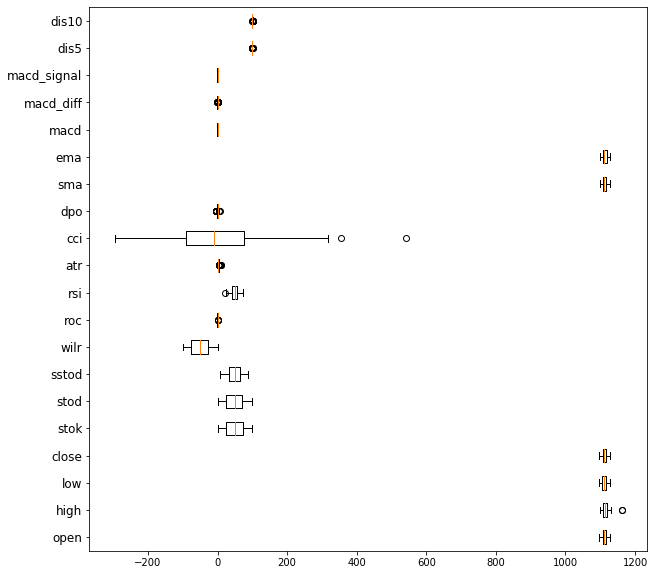

In [53]:
plt.figure(figsize=(10,10))
plt.boxplot(X.values,vert=False)
plt.yticks(np.arange(1,X.shape[1]+1),
           X.columns,fontsize=12)
plt.show()

## Standardization, Normalization (MinMax) and Norm-Scaling

**Inspiration:**

* [ScikitLearn Overview](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)
* [A Note on Feature Scaling and Normalization](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Setting up the Scalers!
mm_scaler = MinMaxScaler()
scaler = StandardScaler()
norm_scaler = Normalizer()
pt = PowerTransformer()
ptNst = PowerTransformer(standardize=False)
qtUni = QuantileTransformer(n_quantiles=100)
qtGau = QuantileTransformer(n_quantiles=100,output_distribution='normal')

## Standardization

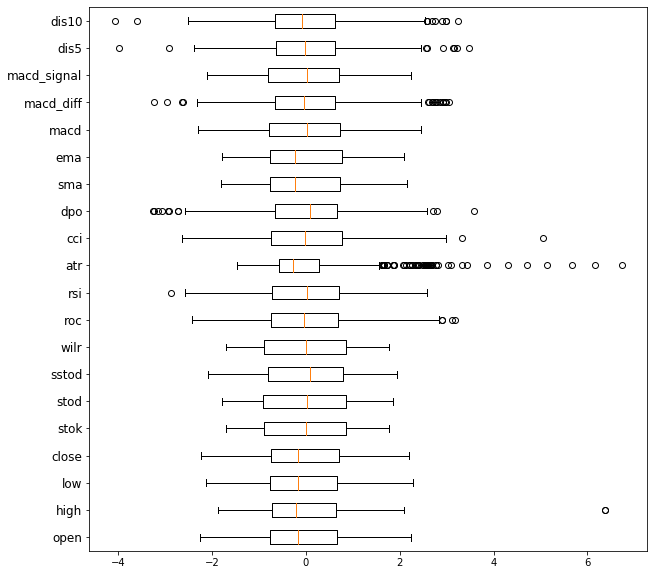

In [60]:
plt.figure(figsize=(10,10))
plt.boxplot(scaler.fit_transform(X),vert=False)
plt.yticks(np.arange(1,X.shape[1]+1),
           X.columns,fontsize=12)
plt.show()

## Normalization

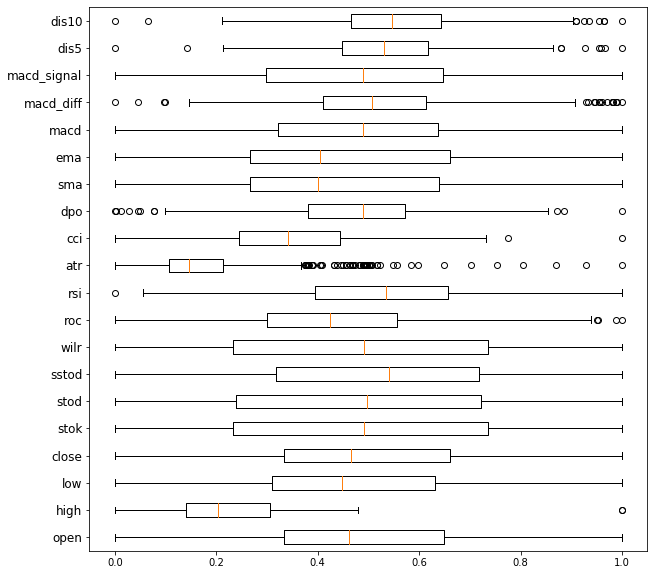

In [61]:
plt.figure(figsize=(10,10))
plt.boxplot(mm_scaler.fit_transform(X),vert=False)
plt.yticks(np.arange(1,X.shape[1]+1),
           X.columns,fontsize=12)
plt.show()

## Norm-Scaling

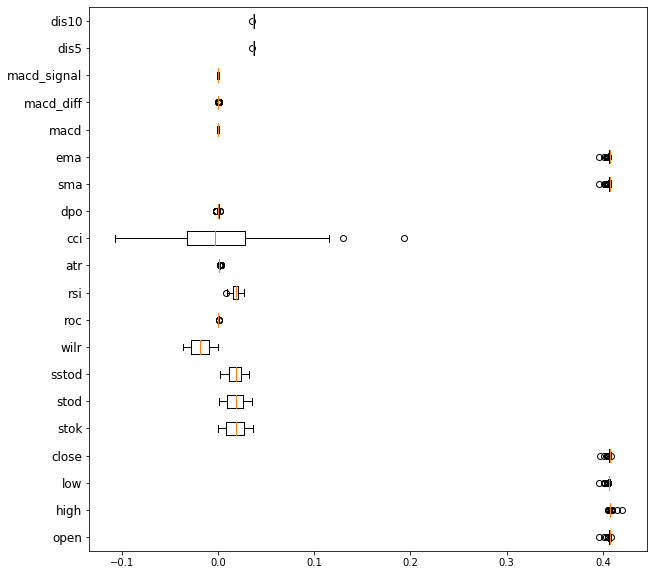

In [64]:
plt.figure(figsize=(10,10))
plt.boxplot(norm_scaler.fit_transform(X),vert=False)
plt.yticks(np.arange(1,X.shape[1]+1),
           X.columns,fontsize=12)
plt.show()

## Quantile Transformation (Uniform)

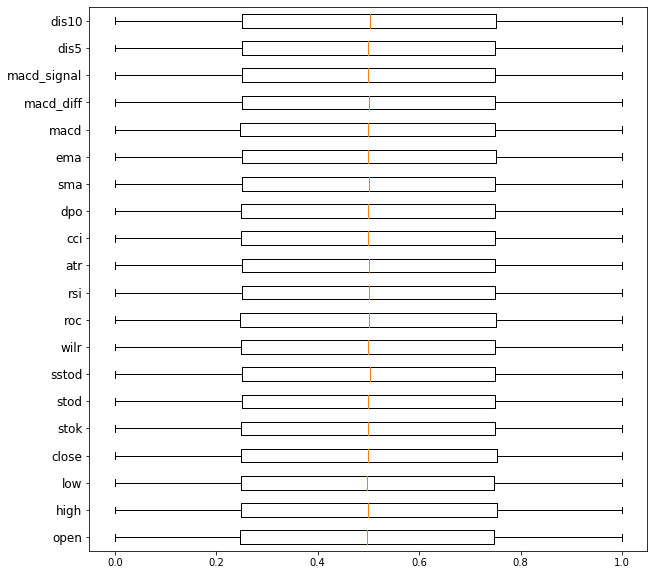

In [74]:
plt.figure(figsize=(10,10))
plt.boxplot(qtUni.fit_transform(X),vert=False)
plt.yticks(np.arange(1,X.shape[1]+1),
           X.columns,fontsize=12)
plt.show()

## Quantile Transform (Gaussian)

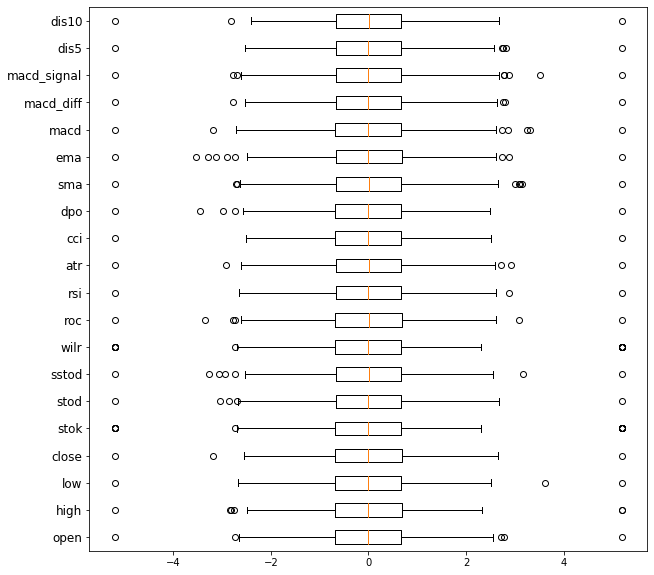

In [75]:
plt.figure(figsize=(10,10))
plt.boxplot(qtGau.fit_transform(X),vert=False)
plt.yticks(np.arange(1,X.shape[1]+1),
           X.columns,fontsize=12)
plt.show()

## Power Transformation (Standardized)

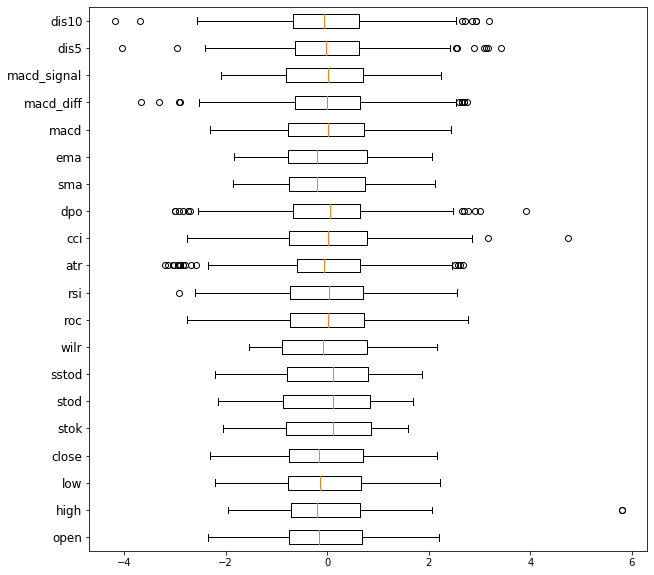

In [67]:
plt.figure(figsize=(10,10))
plt.boxplot(pt.fit_transform(X),vert=False)
plt.yticks(np.arange(1,X.shape[1]+1),
           X.columns,fontsize=12)
plt.show()

## Power (Not Standardized)

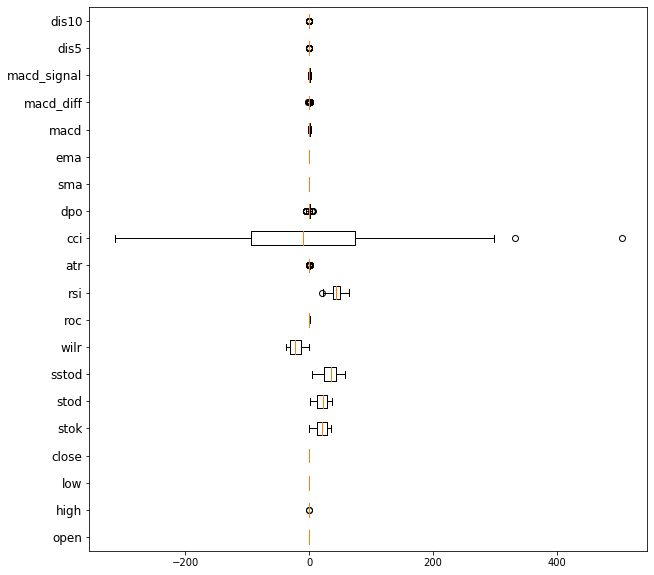

In [77]:
plt.figure(figsize=(10,10))
plt.boxplot(ptNst.fit_transform(X),vert=False)
plt.yticks(np.arange(1,X.shape[1]+1),
           X.columns,fontsize=12)
plt.show()

## Split data into train and test set

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((684, 12), (77, 12), (684,), (77,))

In [21]:
X

,stok_lag0,rsi_lag0,stok_lag1,rsi_lag1,stok_lag2,rsi_lag2,stok_lag3,rsi_lag3,stok_lag4,rsi_lag4,stok_lag5,rsi_lag5
0,34.650670,38.190482,34.509527,38.127207,30.557516,36.435332,53.539873,42.747368,66.831334,47.132255,75.088920,50.096776
1,30.400000,40.039506,34.650670,38.190482,34.509527,38.127207,30.557516,36.435332,53.539873,42.747368,66.831334,47.132255
2,31.028037,44.271410,30.400000,40.039506,34.650670,38.190482,34.509527,38.127207,30.557516,36.435332,53.539873,42.747368
3,24.208411,42.486262,31.028037,44.271410,30.400000,40.039506,34.650670,38.190482,34.509527,38.127207,30.557516,36.435332
4,13.751313,37.927234,24.208411,42.486262,31.028037,44.271410,30.400000,40.039506,34.650670,38.190482,34.509527,38.127207
...,...,...,...,...,...,...,...,...,...,...,...,...
756,92.141063,62.398921,70.450281,49.769063,58.917197,54.074441,63.421292,55.306438,88.989991,62.855193,35.571260,46.562037
757,73.084973,53.047195,92.141063,62.398921,70.450281,49.769063,58.917197,54.074441,63.421292,55.306438,88.989991,62.855193
758,90.962746,59.221774,73.084973,53.047195,92.141063,62.398921,70.450281,49.769063,58.917197,54.074441,63.421292,55.306438
759,88.781917,58.216044,90.962746,59.221774,73.084973,53.047195,92.141063,62.398921,70.450281,49.769063,58.917197,54.074441
